## 用来处理数据

In [1]:
#数据读取，从data文件中读
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import re   

# 读取数据文件
#参数header:哪一行是数据的名字
#参数delim:用什么符号作为分隔符，参数值是字符串，比如：';'分号   '\t'制表符
#skiprows.  skipfooter. 跳过头尾多少行，参数值是int
Lx = 20000
Ly = 1
J_set = 1

Heat_cap_list =[]
Magnet_sus_list = []
T_list = []
T_conti = np.array([]) #连续的T序列，用于解析绘制曲线
ave_ener_list = []
ave_mag_list = []


下面读取数据，数据存储在data/目录下，数据文件的名字代表了产生数据时设定的参数。

读取过程：

首先通过os.listdir()函数，找到data/目录下的所有文件，然后将他们存储在listdir这个变量下。

然后建立一个文件名与数据内容的字典。存在变量data_dir下：遍历listdir，如果文件名与正则表达式匹配，则提取参数值并读取CSV文件



In [11]:
# 定义文件夹路径
folder_path = 'data/'
#正则表达式
filename_pattern = re.compile(r'k(\d+(\.\d+)?)L(\d+)T(\d+(\.\d+)?)\.csv')

#这是一个字典
data_dir = {}
params_dir = {}

#这是文件名字列表？
listdir = os.listdir("data/")

for file in listdir:
# 使用正则表达式检查文件名是否匹配
    match = filename_pattern.match(file)
    if match:
        # 如果文件名匹配，则提取参数值并读取CSV文件
        # 如果文件名匹配，则提取参数值并读取CSV文件

        file_path = os.path.join(folder_path, file)
        print(file)

        #data = pd.read_csv(file_path, delim_whitespace=True)
        data = pd.read_csv(file_path)
        #data_dir[file] = data


        TotalStep = data["step"].iloc[-1]
        k = float(match.group(1))  # k 可能是整数或浮点数
        Lx = int(match.group(3))  # L 是整数
        T = float(match.group(4))  # T 可能是整数或浮点数
        params_dir[(k, Lx, T, TotalStep, file)] = data
        print(k,Lx,T,TotalStep,file)
      
        



k0.01L100000T0.5.csv
0.01 100000 0.5 1999800001 k0.01L100000T0.5.csv
k0.01L100000T0.566667.csv
0.01 100000 0.566667 1999800001 k0.01L100000T0.566667.csv
k0.01L100000T0.633333.csv
0.01 100000 0.633333 1999800001 k0.01L100000T0.633333.csv
k0.01L100000T0.7.csv
0.01 100000 0.7 1999800001 k0.01L100000T0.7.csv
k0.01L100000T0.766667.csv
0.01 100000 0.766667 1999800001 k0.01L100000T0.766667.csv
k0.01L100000T0.833333.csv
0.01 100000 0.833333 1999800001 k0.01L100000T0.833333.csv
k0.01L100000T0.9.csv
0.01 100000 0.9 1999800001 k0.01L100000T0.9.csv
k0.01L100000T0.966667.csv
0.01 100000 0.966667 1999800001 k0.01L100000T0.966667.csv
k0.01L100000T1.03333.csv
0.01 100000 1.03333 1999800001 k0.01L100000T1.03333.csv
k0.01L100000T1.1.csv
0.01 100000 1.1 1999800001 k0.01L100000T1.1.csv
k0.01L10000T0.5.csv
0.01 10000 0.5 1999800001 k0.01L10000T0.5.csv
k0.01L10000T0.566667.csv
0.01 10000 0.566667 1999800001 k0.01L10000T0.566667.csv
k0.01L10000T0.633333.csv
0.01 10000 0.633333 1999800001 k0.01L10000T0.633333

画每一个模拟的step-A图。


(0.01, 100000, 0.5, 1999800001, 'k0.01L100000T0.5.csv')
(0.01, 100000, 0.566667, 1999800001, 'k0.01L100000T0.566667.csv')
(0.01, 100000, 0.633333, 1999800001, 'k0.01L100000T0.633333.csv')
(0.01, 100000, 0.7, 1999800001, 'k0.01L100000T0.7.csv')
(0.01, 100000, 0.766667, 1999800001, 'k0.01L100000T0.766667.csv')
(0.01, 100000, 0.833333, 1999800001, 'k0.01L100000T0.833333.csv')
(0.01, 100000, 0.9, 1999800001, 'k0.01L100000T0.9.csv')
(0.01, 100000, 0.966667, 1999800001, 'k0.01L100000T0.966667.csv')
(0.01, 100000, 1.03333, 1999800001, 'k0.01L100000T1.03333.csv')
(0.01, 100000, 1.1, 1999800001, 'k0.01L100000T1.1.csv')
(0.01, 10000, 0.5, 1999800001, 'k0.01L10000T0.5.csv')
(0.01, 10000, 0.566667, 1999800001, 'k0.01L10000T0.566667.csv')
(0.01, 10000, 0.633333, 1999800001, 'k0.01L10000T0.633333.csv')
(0.01, 10000, 0.7, 1999800001, 'k0.01L10000T0.7.csv')
(0.01, 10000, 0.766667, 1999800001, 'k0.01L10000T0.766667.csv')
(0.01, 10000, 0.833333, 1999800001, 'k0.01L10000T0.833333.csv')
(0.01, 10000, 0.9,

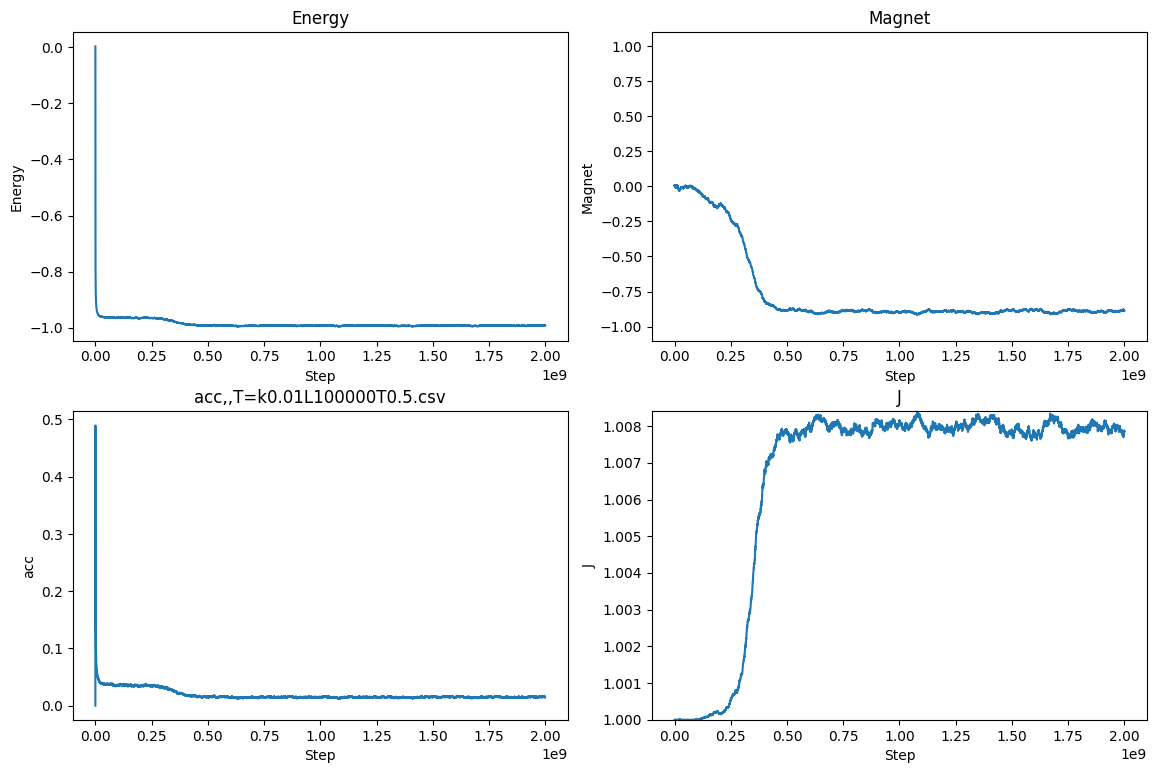

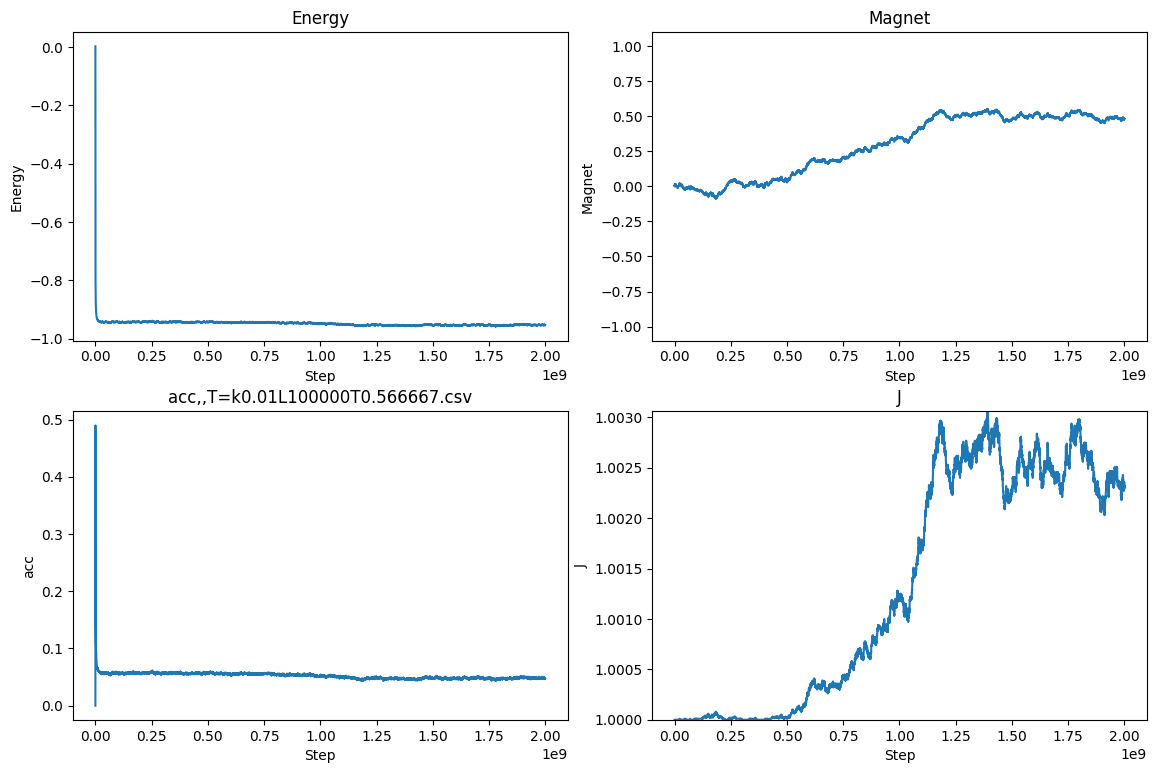

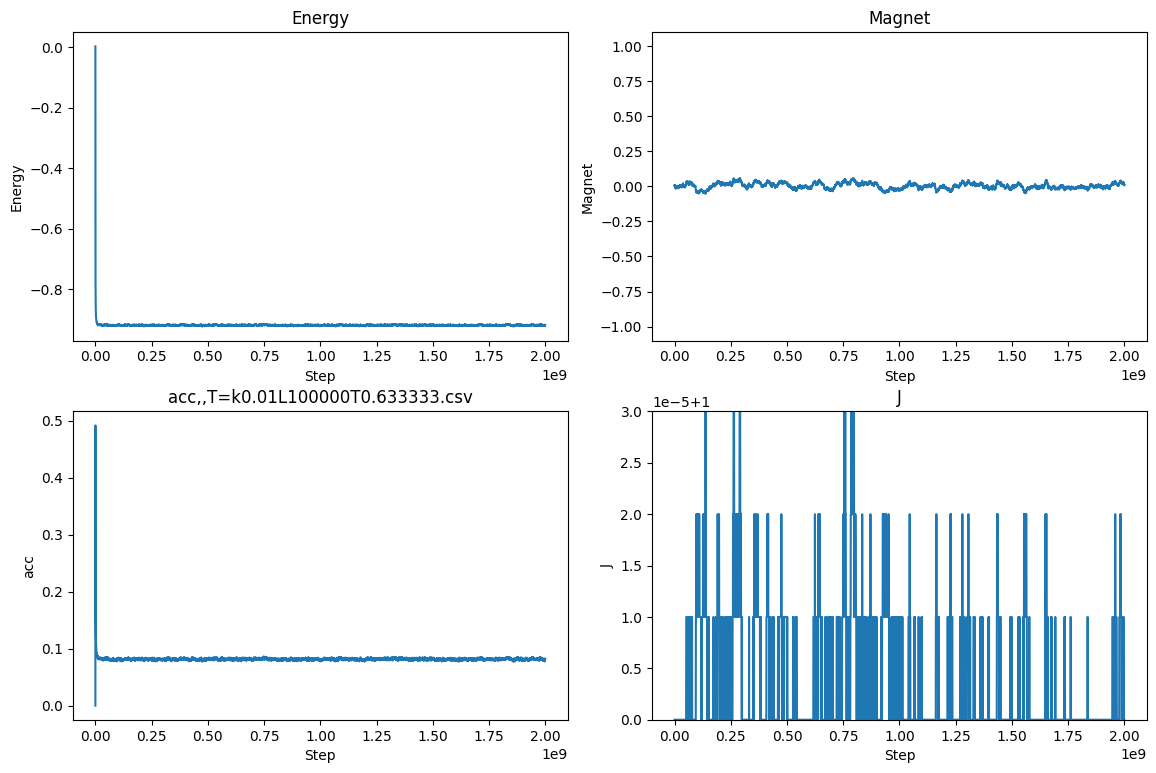

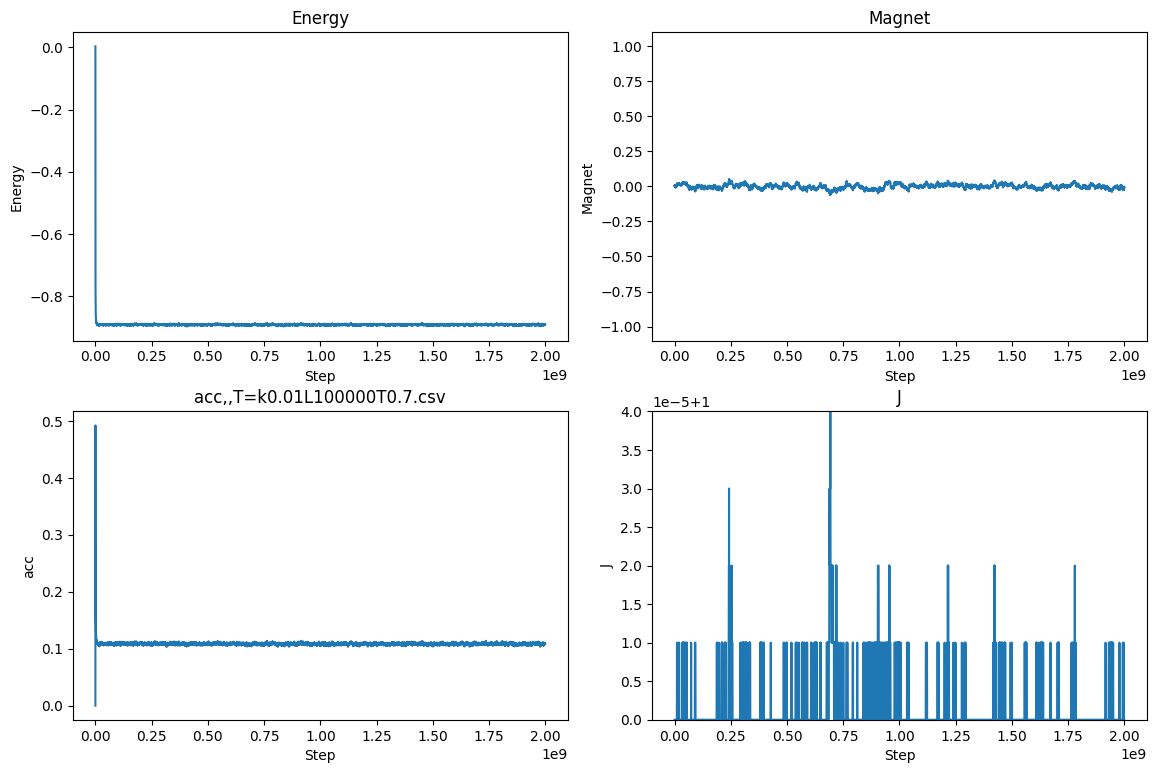

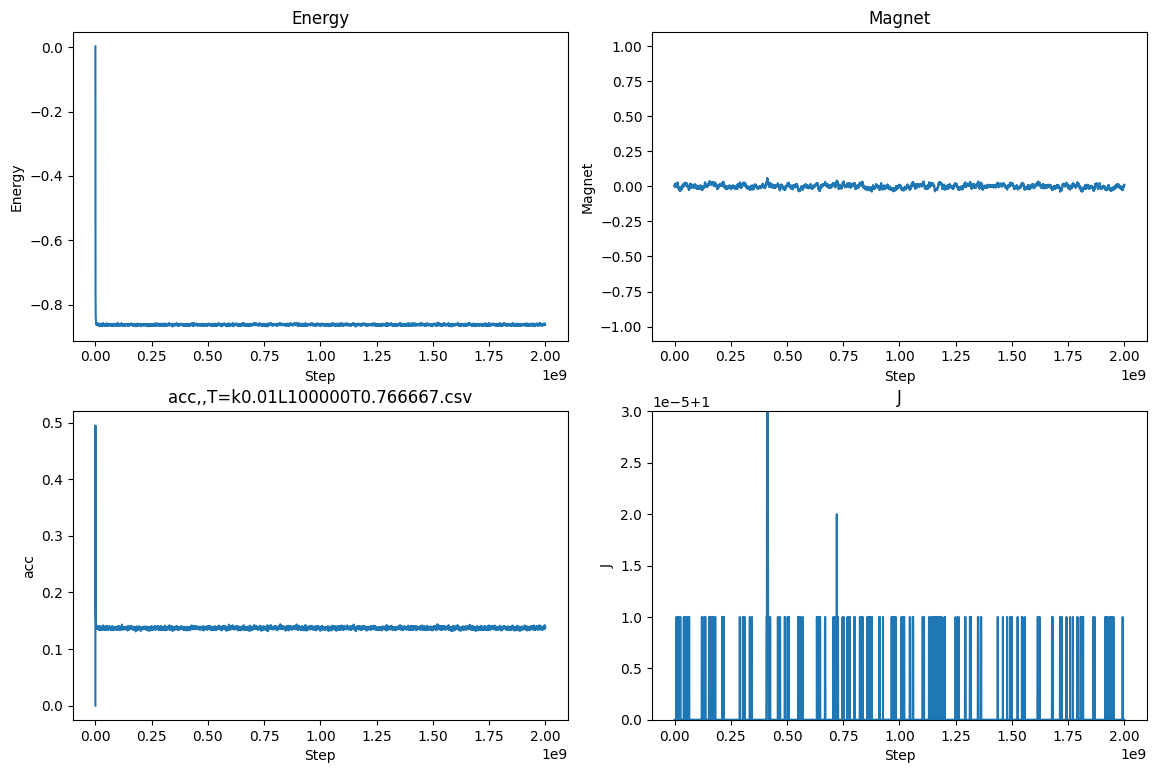

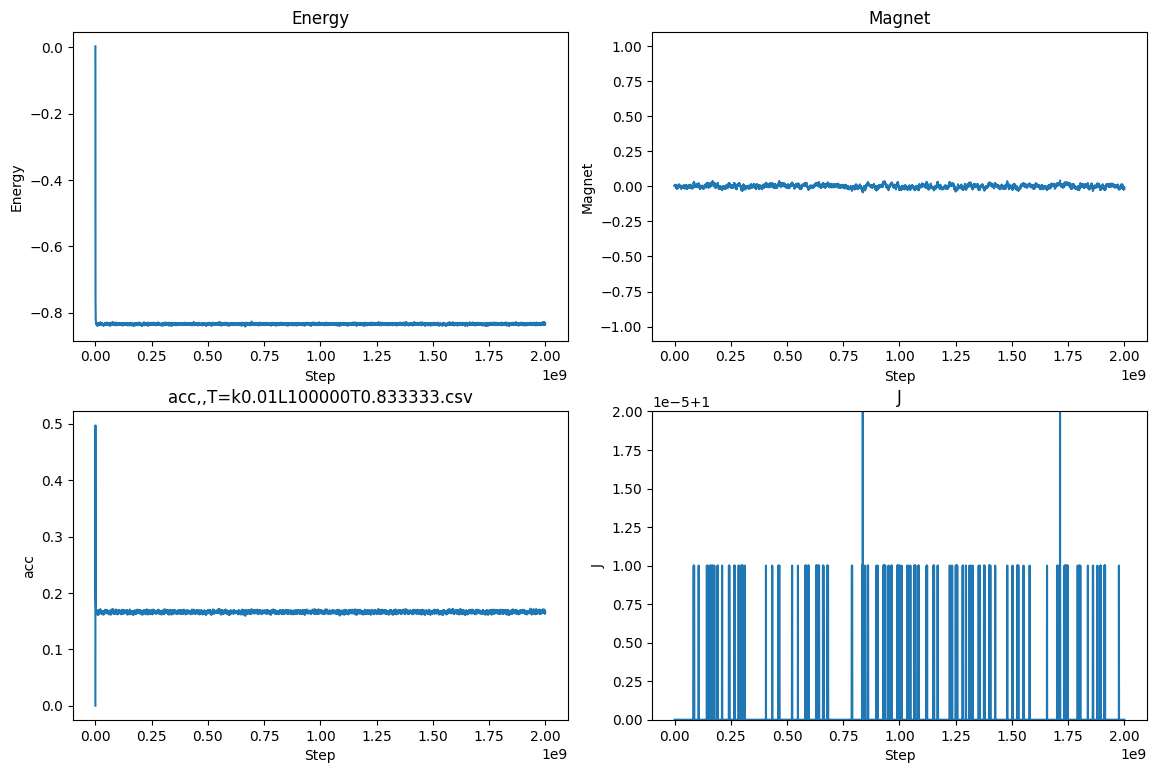

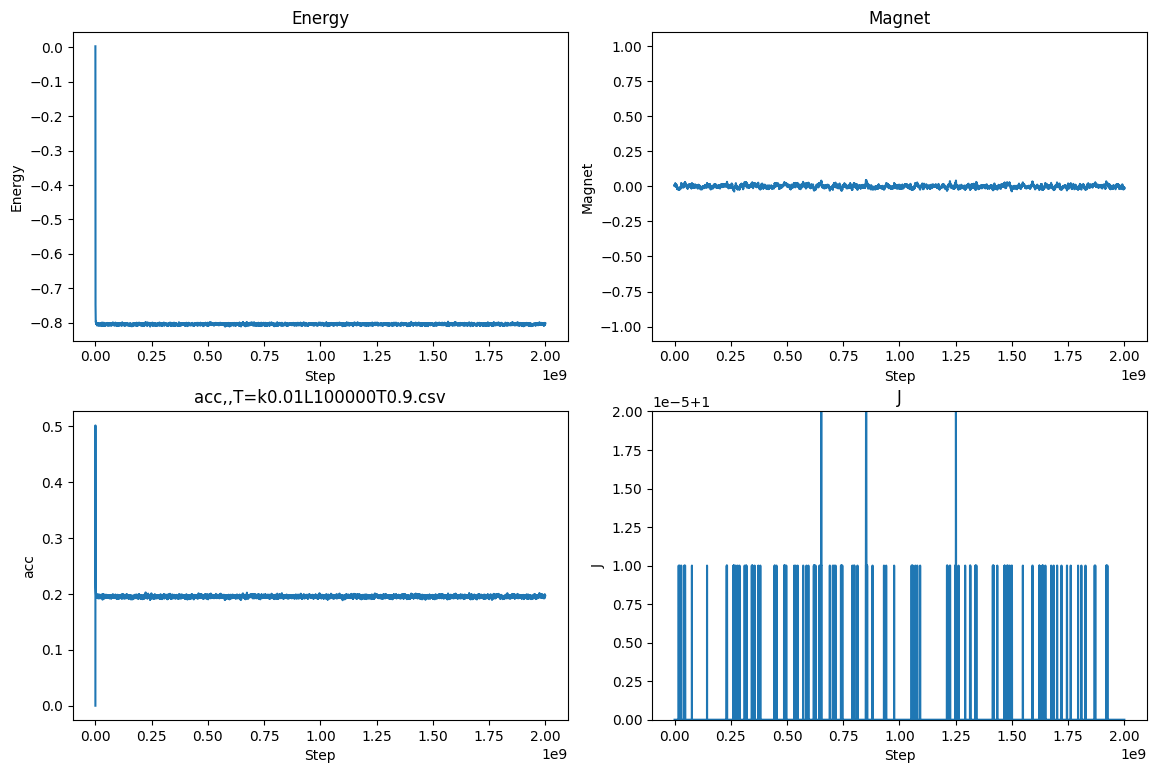

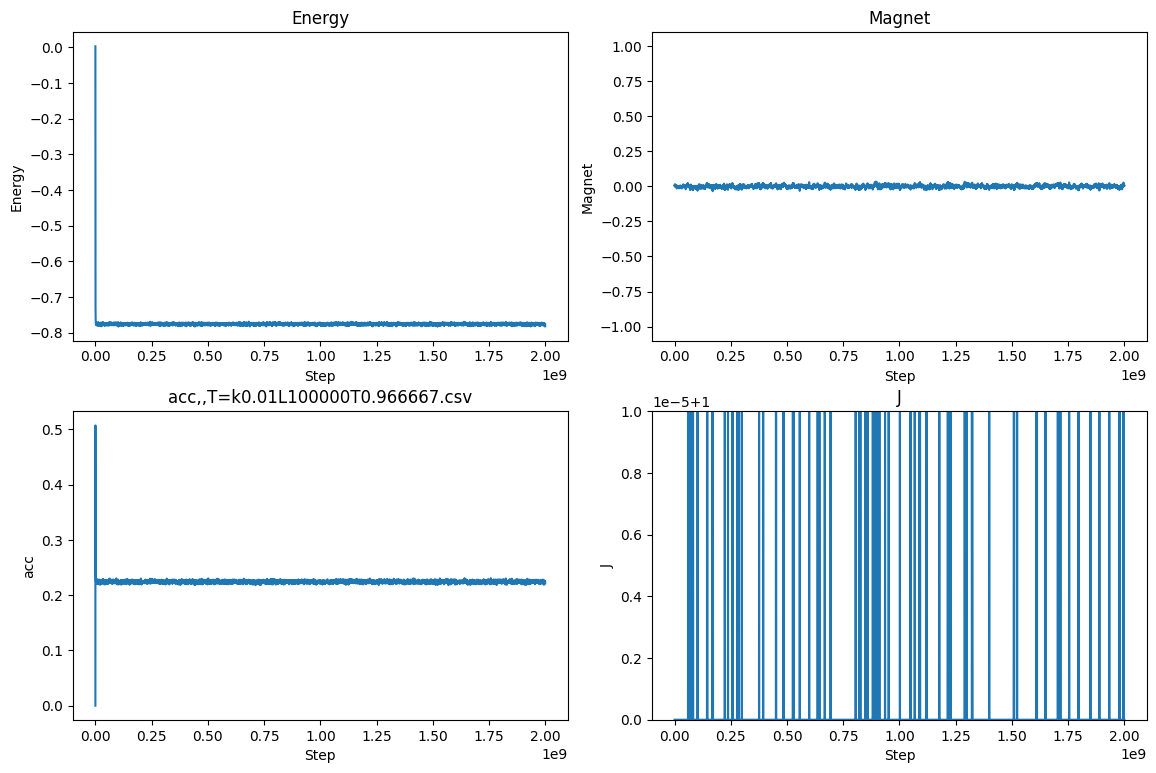

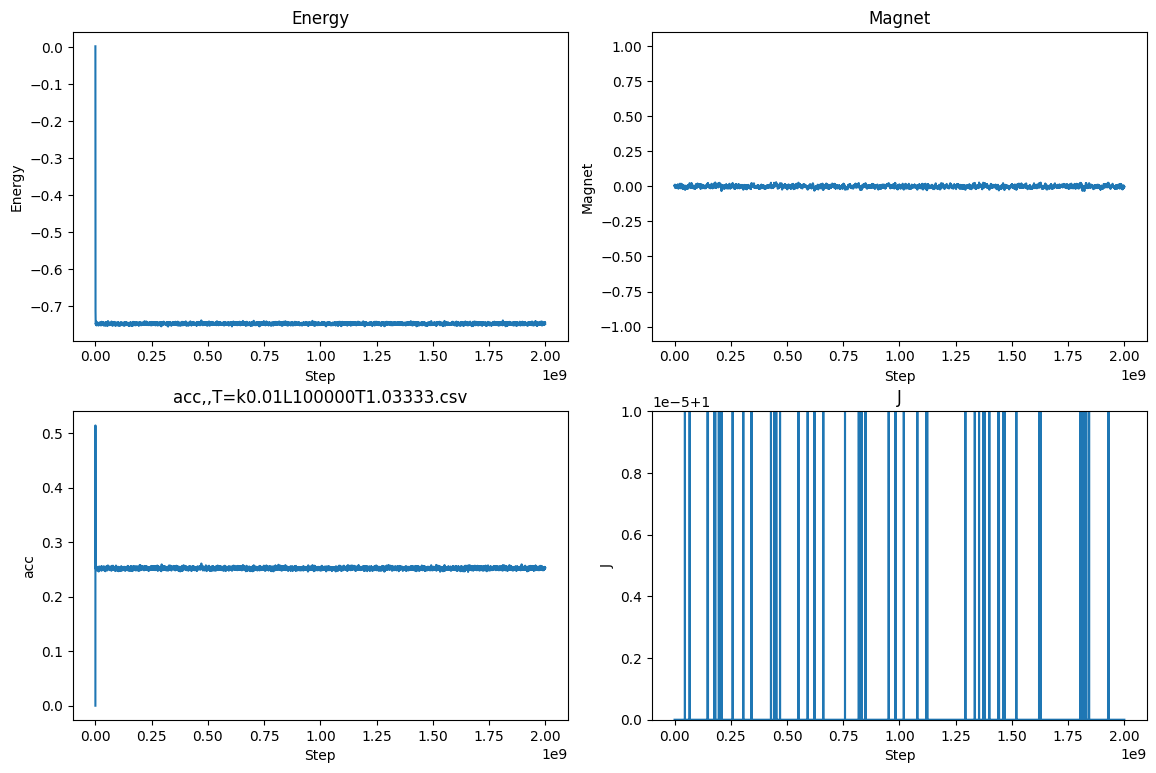

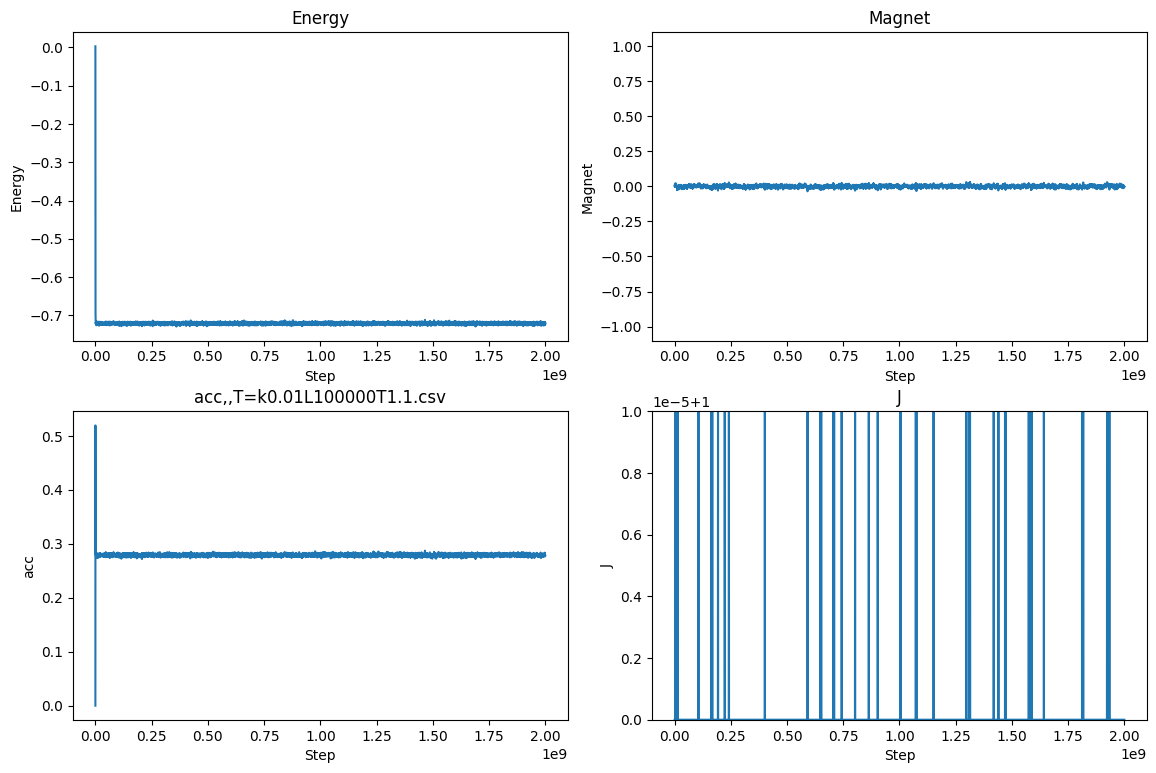

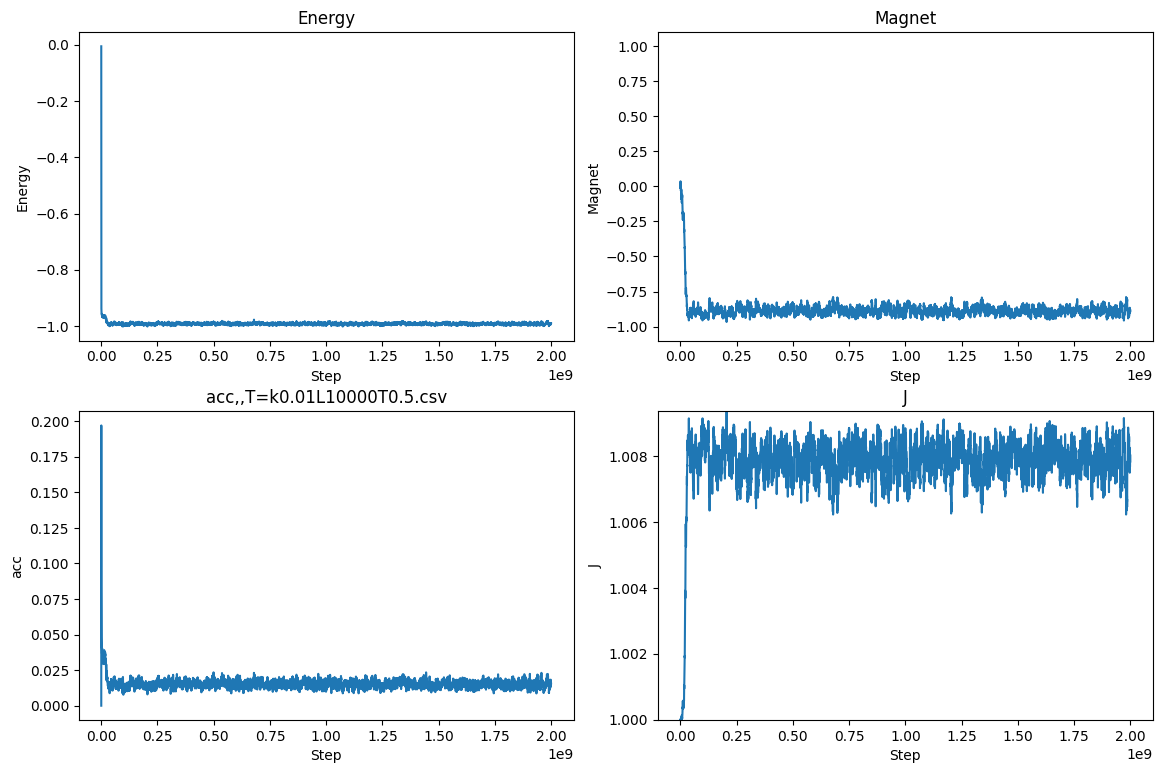

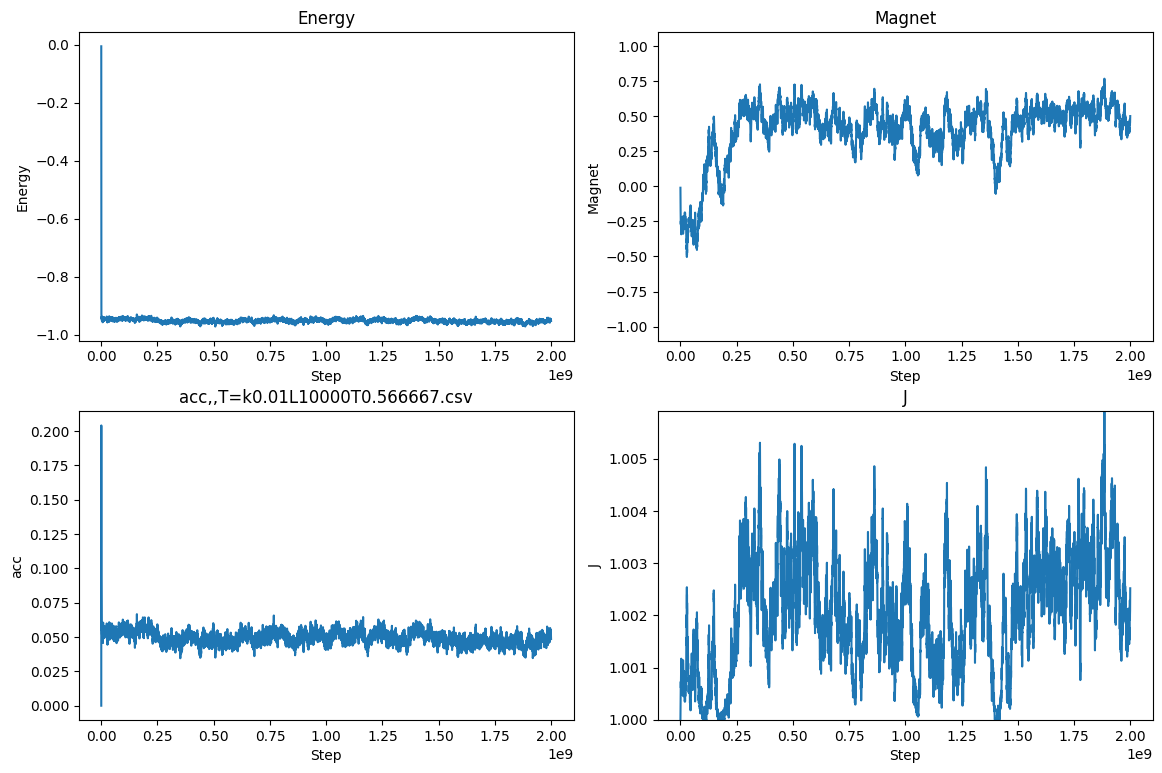

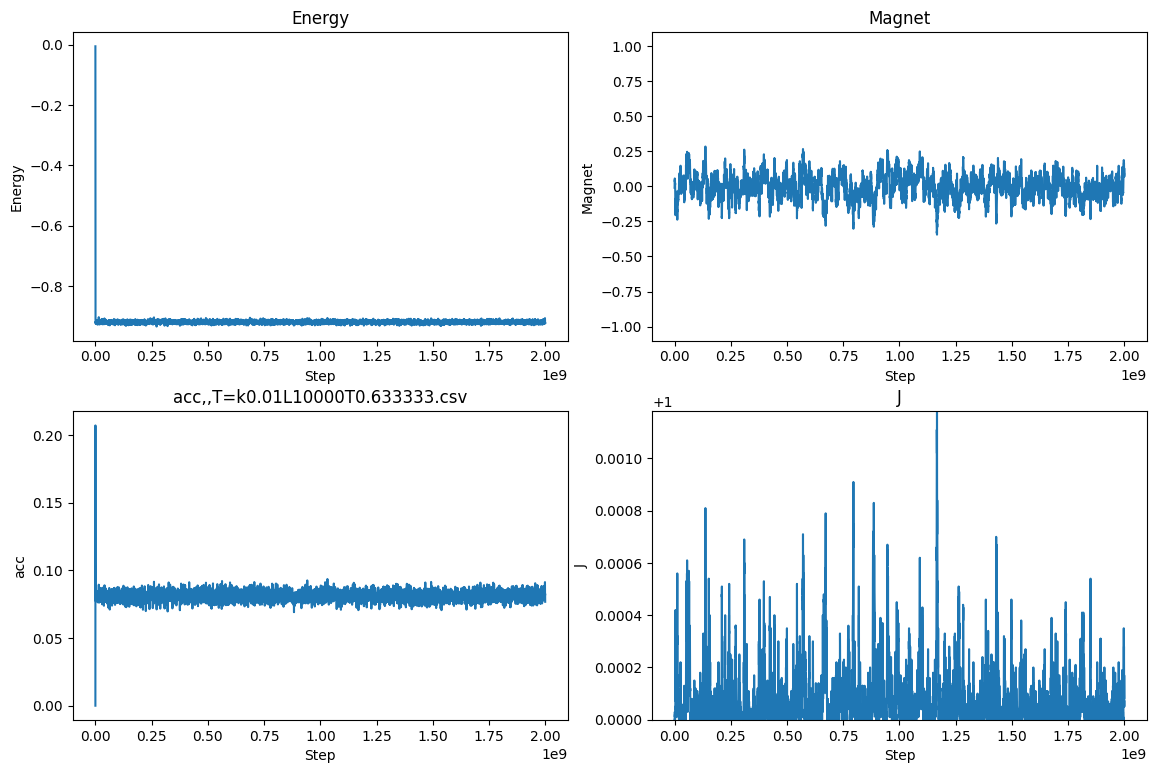

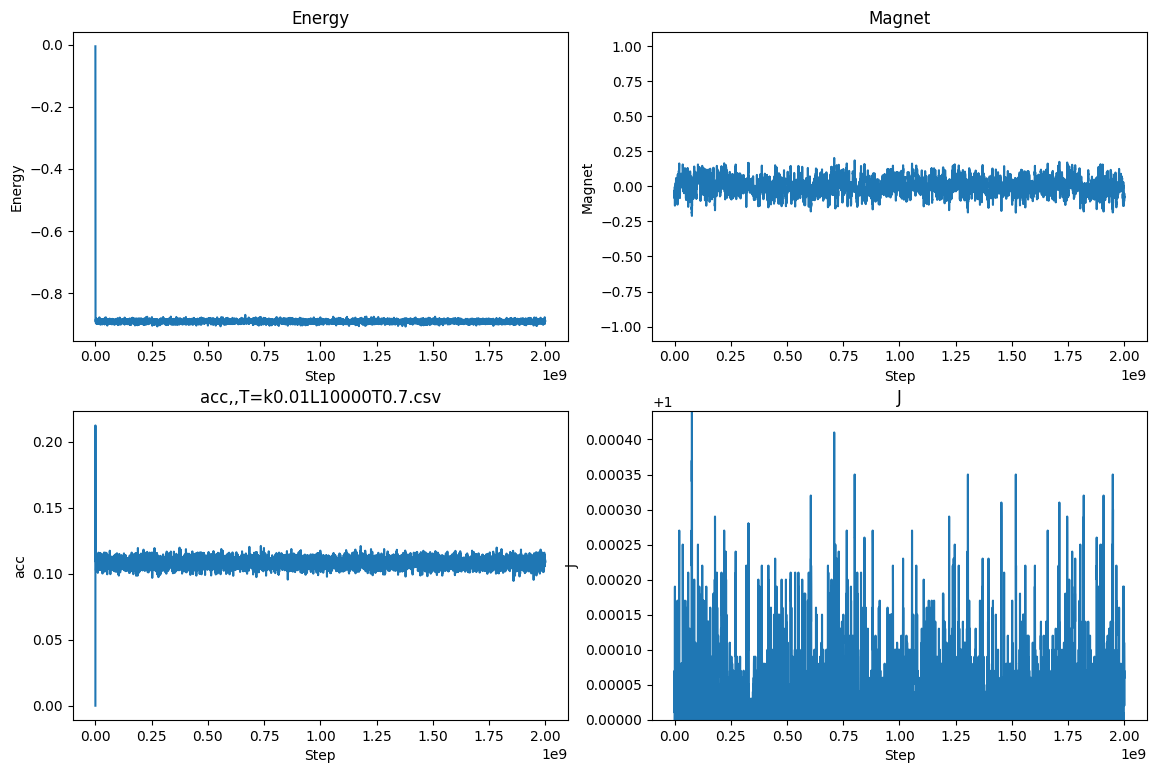

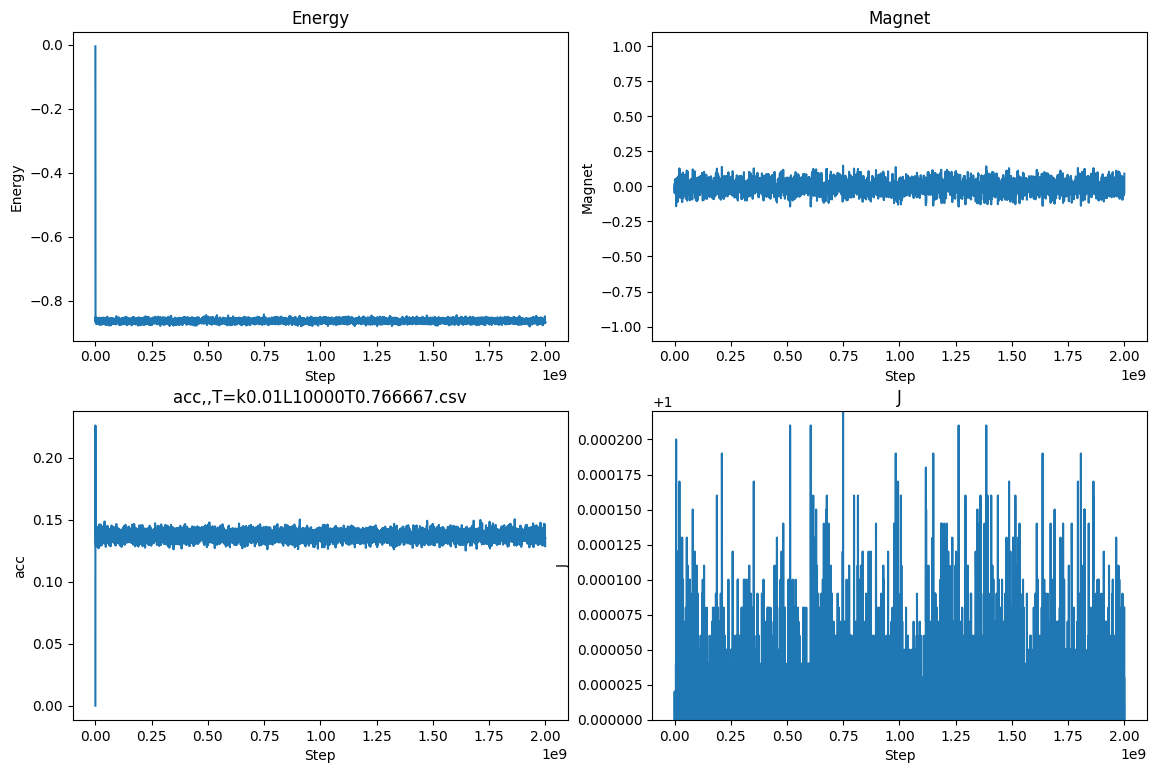

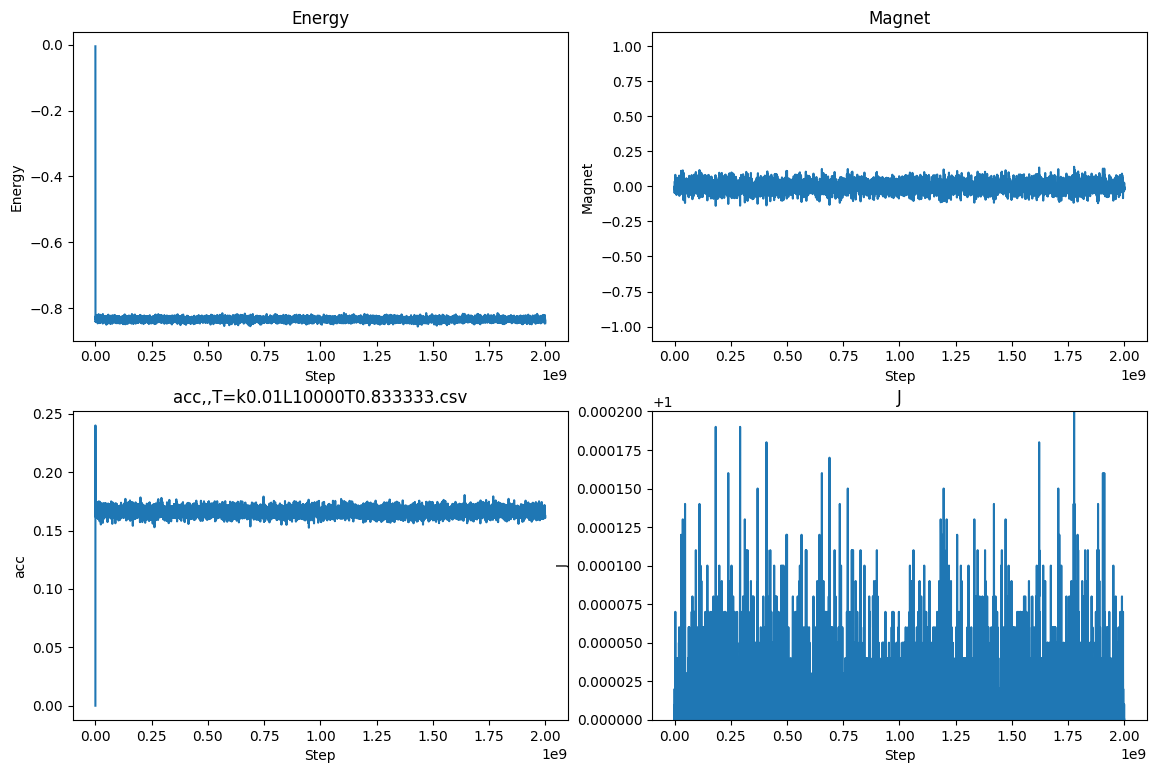

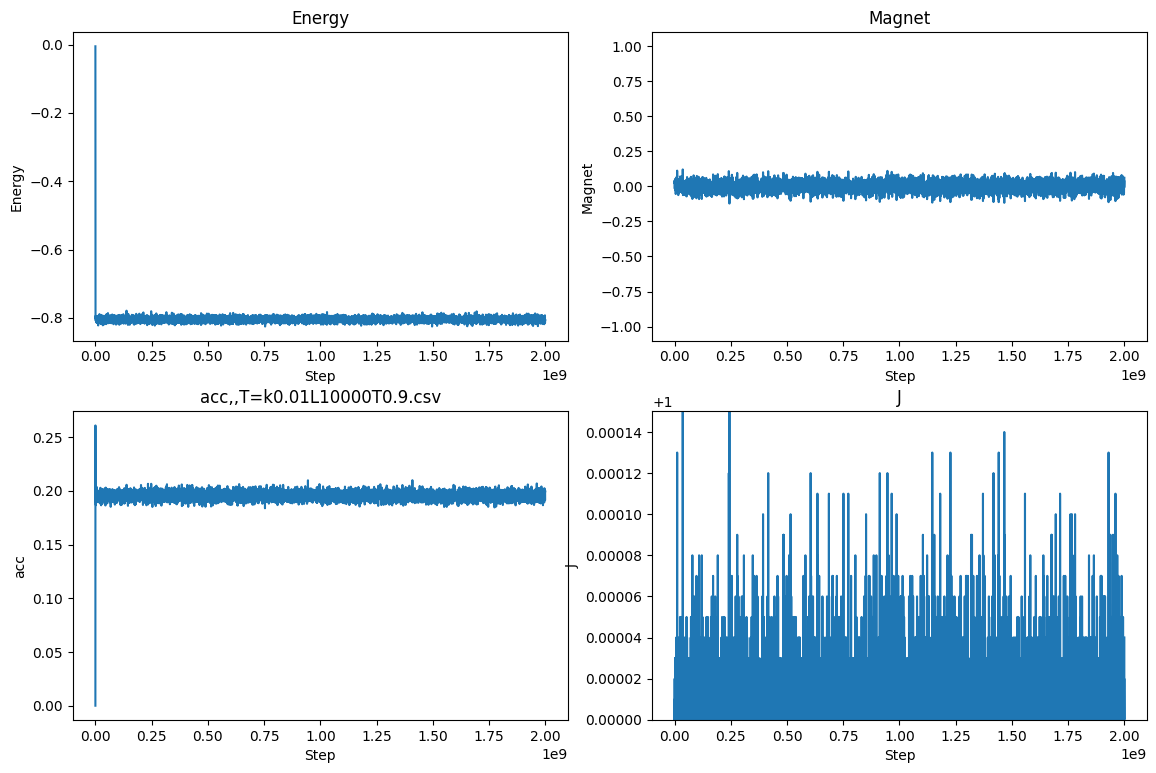

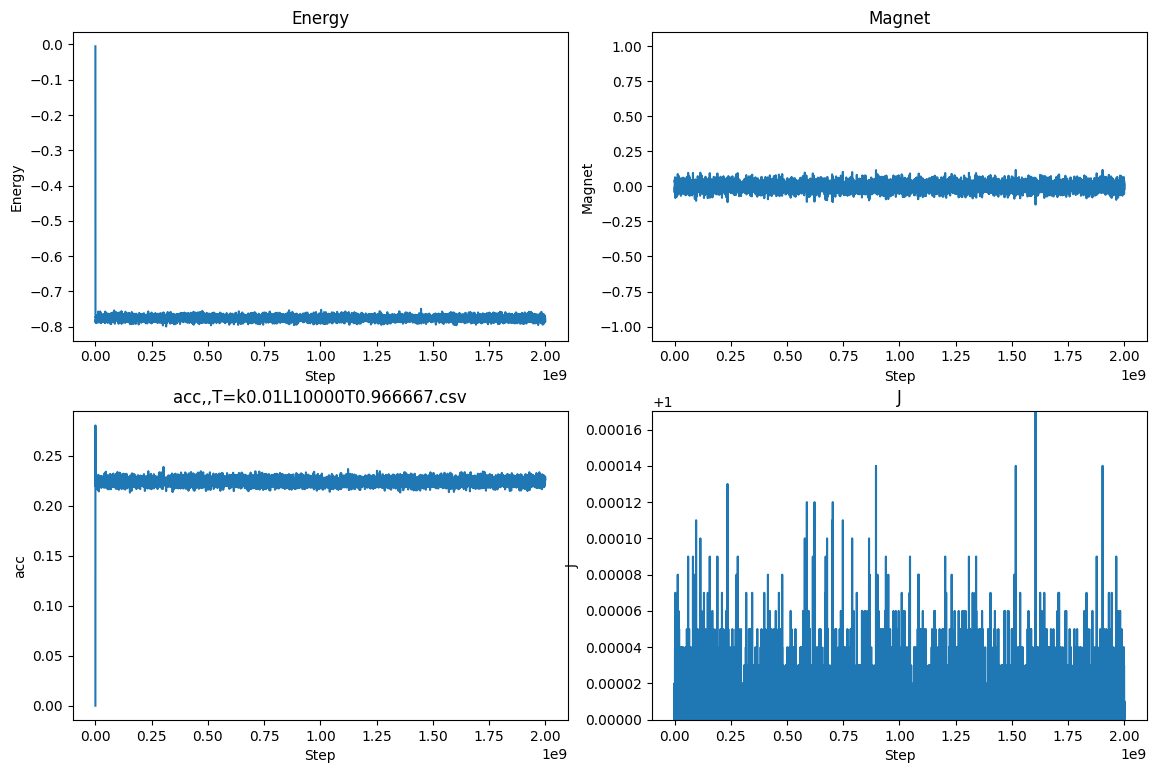

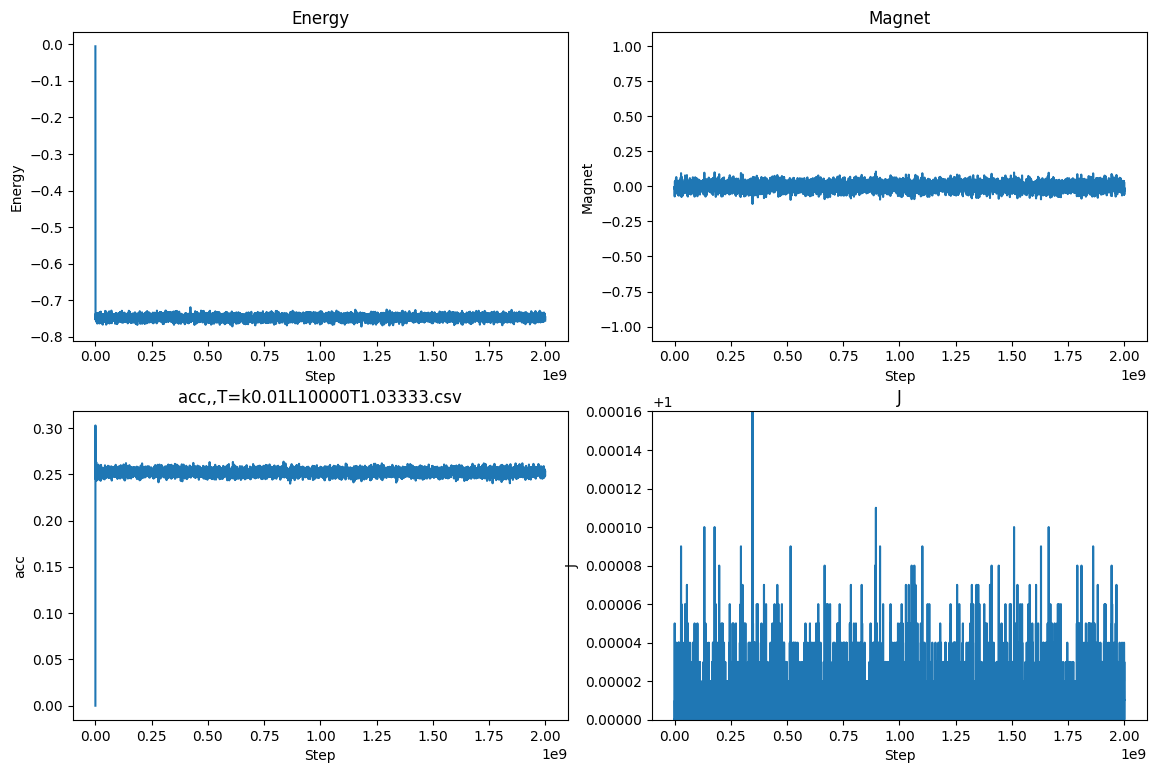

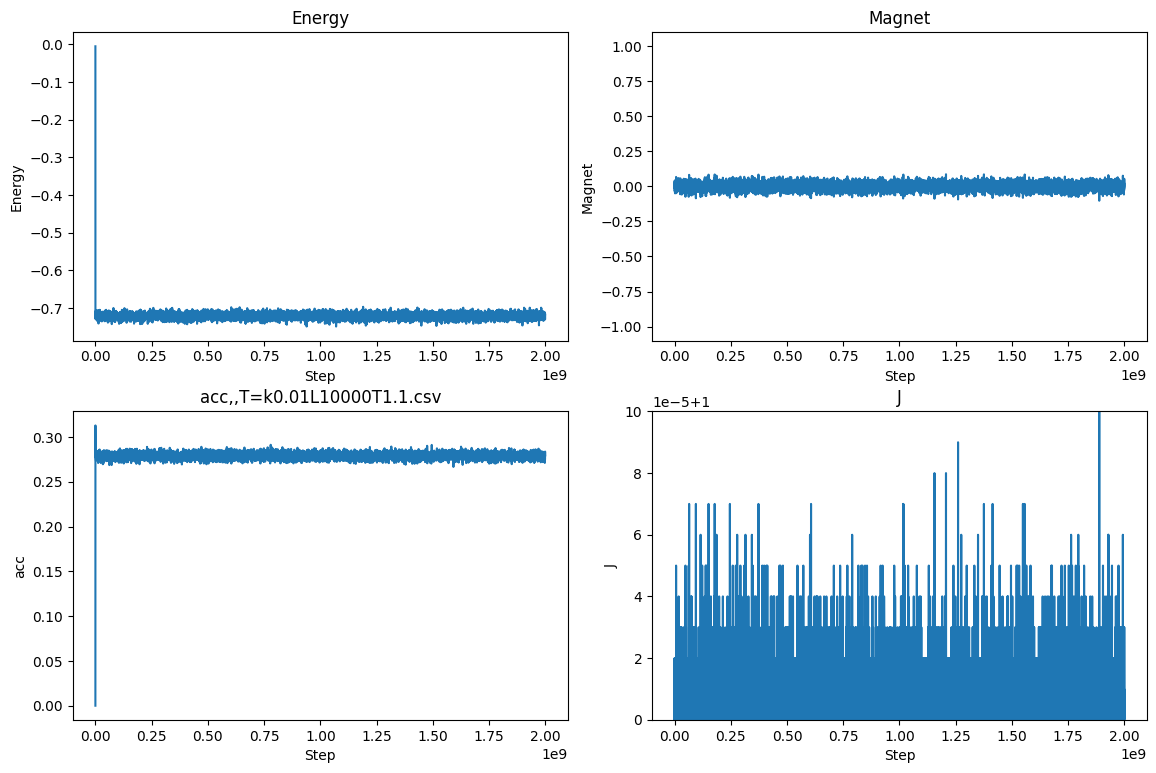

In [13]:

for params,data in params_dir.items():
    step = data["step"]
    lenth = len(step)
    half_len = int(lenth /2)
    Energy = data["Energy"]
    Magnet = data["Magnet"]
    acc = data["acc"]
    #h = data["h"]
    J = data["J"]
    ## 创建子图
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    fig.tight_layout(pad=3.0)

    # 绘制各个图表
    #axes[0, 0].scatter(step, Energy)
    axes[0, 0].plot(step, Energy)
    axes[0, 0].set_title('Energy')
    axes[0, 0].set_xlabel('Step')
    axes[0, 0].set_ylabel('Energy')

    #axes[0, 1].scatter(step, Magnet)
    axes[0, 1].plot(step, Magnet)
    axes[0, 1].set_ylim(-1.1, 1.1)
    axes[0, 1].set_title('Magnet')
    axes[0, 1].set_xlabel('Step')
    axes[0, 1].set_ylabel('Magnet')


    axes[1, 0].plot(step, acc)
    axes[1, 0].set_title('acc,,T='+params[-1])
    axes[1, 0].set_xlabel('Step')
    axes[1, 0].set_ylabel('acc')

    axes[1, 1].plot(step, J)
    axes[1, 1].set_title('J')
    axes[1, 1].set_ylim(min(J), max(J))
    #axes[1, 1].set_ylim(-0.1, 0.1)
    axes[1, 1].set_xlabel('Step')
    axes[1, 1].set_ylabel('J')

    plt.savefig("img/"+params[-1]+".png")



计算热力学量。画大图。

In [20]:
thermos = {}

for params, data in params_dir.items():
    k, Lx, T, TotalStep, file = params
    step = data["step"]
    lenth = len(step)
    half_len = int(lenth / 2)
    Energy = data["Energy"]
    Magnet = data["Magnet"]
    acc = data["acc"]
    J = data["J"]

    mean_E = np.mean(Energy)
    mean_E2 = np.mean(Energy**2)
    mean_M = np.mean(Magnet)
    mean_M2 = np.mean(Magnet**2)
    mean_M4 = np.mean(Magnet**4)

    std_E = np.std(Energy, ddof=1)
    std_E2 = np.std((Energy)**2, ddof=1)
    std_M = np.std(Magnet, ddof=1)
    std_M2 = np.std(Magnet**2, ddof=1)
    std_M4 = np.std(Magnet**4, ddof=1)

    sigma_mean_E = std_E / np.sqrt(lenth)
    sigma_mean_E2 = std_E2 / np.sqrt(lenth)
    sigma_mean_M = std_M / np.sqrt(lenth)
    sigma_mean_M2 = std_M2 / np.sqrt(lenth)

    thermos[params] = [mean_E, mean_M, std_E, std_M, sigma_mean_E, sigma_mean_E2, sigma_mean_M, sigma_mean_M2]



In [ ]:
print(thermos)
# 提取不同的k和Lx的值
k_values = sorted(set(params[0] for params in thermos.keys()))
Lx_values = sorted(set(params[1] for params in thermos.keys()))

# 创建颜色映射
colors = plt.cm.viridis(np.linspace(0, 1, len(k_values) * len(Lx_values)))

plt.figure(figsize=(12, 6))

# 绘制mean_E与温度T的关系
plt.subplot(1, 2, 1)
color_idx = 0
for k in k_values:
    for Lx in Lx_values:
        filtered_thermos = {params: values for params, values in thermos.items() if params[0] == k and params[1] == Lx}
        T_values = [params[2] for params in filtered_thermos.keys()]
        mean_E_values = [values[0] for values in filtered_thermos.values()]
        plt.plot(T_values, mean_E_values, marker='o', color=colors[color_idx], label=f'k={k}, Lx={Lx}')
        color_idx += 1
plt.xlabel('Temperature (T)')
plt.ylabel('Mean Energy (mean_E)')
plt.title('Mean Energy vs Temperature')
plt.legend()

# 绘制mean_M与温度T的关系
plt.subplot(1, 2, 2)
color_idx = 0
for k in k_values:
    for Lx in Lx_values:
        filtered_thermos = {params: values for params, values in thermos.items() if params[0] == k and params[1] == Lx}
        T_values = [params[2] for params in filtered_thermos.keys()]
        mean_M_values = [values[1] for values in filtered_thermos.values()]
        plt.plot(T_values, mean_M_values, marker='o', color=colors[color_idx], label=f'k={k}, Lx={Lx}')
        color_idx += 1
plt.xlabel('Temperature (T)')
plt.ylabel('Mean Magnetization (mean_M)')
plt.title('Mean Magnetization vs Temperature')
plt.legend()

plt.tight_layout()
plt.show()

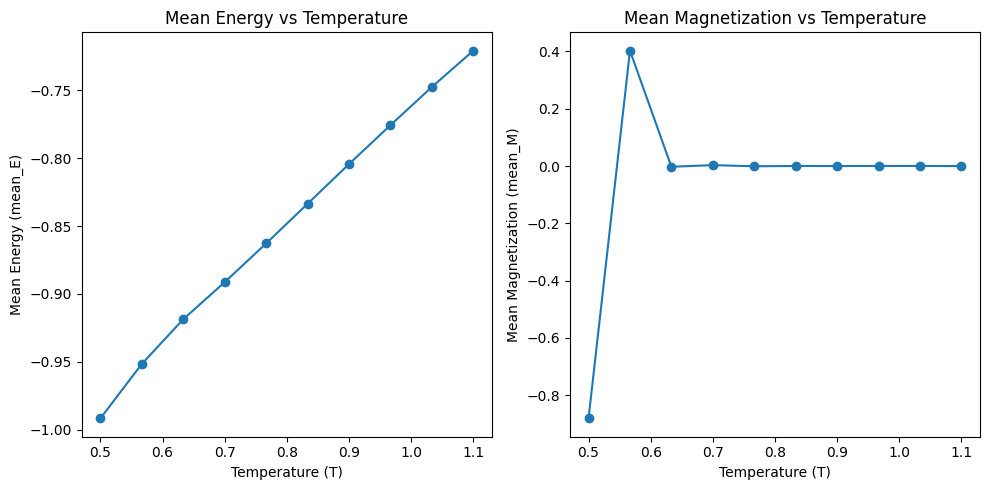

In [21]:
    # 过滤出Lx=10000的数据
filtered_thermos = {params: values for params, values in thermos.items() if params[1] == 10000}

    # 提取温度T、mean_E和mean_M
T_values = [params[2] for params in filtered_thermos.keys()]
mean_E_values = [values[0] for values in filtered_thermos.values()]
mean_M_values = [values[1] for values in filtered_thermos.values()]

    # 绘制mean_E和mean_M与温度T之间的关系
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(T_values, mean_E_values, marker='o')
plt.xlabel('Temperature (T)')
plt.ylabel('Mean Energy (mean_E)')
plt.title('Mean Energy vs Temperature')

plt.subplot(1, 2, 2)
plt.plot(T_values, mean_M_values, marker='o')
plt.xlabel('Temperature (T)')
plt.ylabel('Mean Magnetization (mean_M)')
plt.title('Mean Magnetization vs Temperature')

plt.tight_layout()
plt.show()
